In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
# switch off the warnings
warnings.filterwarnings("ignore")

In [89]:
# read data
df = pd.read_csv('./보이스피싱-종합1_2.csv', encoding='utf-8')
df.head(8) # check data

,index,문자내용
0,1,아빠 폰액정깨져서 A.S 맡기고 임시폰 대리받아 연락했어 통화안되니까 문자 확인하면...
1,1,엄마~내꺼 폰화면이 깨져서 수리하러 왔어ㅠㅠ이번호로 카톡추가하고 톡줘.
2,1,엄마 이번호로 카톡추가하교 톡줘 임시폰이라 문자하면 안돼
3,1,엄마 나 폰고장나서 대리받은 임시번호라 문자만가능해 부탁있어 문자줘~
4,1,"[국제발신] [해외구매] 966,000원 결제완료 주문하신 물품은 14일이내 배송예..."
5,1,엄마 나 폰 고장났어. 이 번호 문자밖에 안돼. 문자보면 여기로 답줘.
6,1,엄마 나 폰고장나서 문자나라에서 임시번호로 문자하는거야 문자 확인되면여기로 문자해줘
7,1,제목없음 웅 엄마 엄마 나 실수로 폰 떨어 뜨렸는데 액정이 나갔어 ㅠ 금방 수리센터...


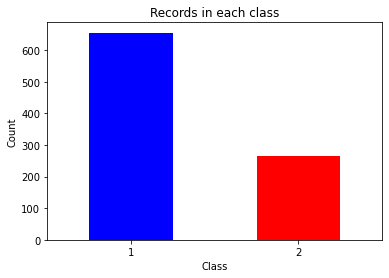

In [90]:
count_classes = df['index'].value_counts()
plt.title("Records in each class")
count_classes.plot(kind='bar', color=['b', 'r'])
plt.xticks(rotation='horizontal')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [55]:
def plot_most_common(count, class_name, color):
    # count frequency of each word in each class
    count_res = Counter(" ".join(df[df['index']==class_name]["문자내용"]).split()).most_common(count)
    # convert to dataframe
    df_count = pd.DataFrame.from_dict(count_res)
    # rename columns
    df_count = df_count.rename(columns={0: class_name, 1 : "count"})
    
    # draw bar plot
    df_count.plot(kind='bar', color=color, legend=False)
    x = np.arange(len(df_count[class_name]))
    plt.xticks(x, df_count[class_name])
    plt.title('The most frequent ' + class_name + ' messages')
    plt.xlabel('words')
    plt.ylabel('count')


# call the function twice (for 'ham' and 'spam' classes respectively)
plot_most_common(20, '1', 'b')
plot_most_common(20, '2', 'r')
plt.show()

TypeError: no numeric data to plot

In [91]:
# check shape
df.shape

(919, 2)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   919 non-null    int64 
 1   문자내용    919 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.5+ KB


In [93]:
df.drop_duplicates(subset=['문자내용'], inplace=True)
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 873


In [94]:
print('결측값 여부 :',df.isnull().values.any())

결측값 여부 : False


In [95]:
print('"Text"의 유니크한 값 :',df['문자내용'].nunique())

"Text"의 유니크한 값 : 873


In [96]:
X_data = df['index']
y_data = df['문자내용']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 873
레이블의 개수: 873


In [164]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["문자내용"])

In [165]:
# convert to array
X = X.toarray()

# check size of X
X.shape

(873, 3204)

In [166]:
# look for first 5 rows in X
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    df['index'], 
                                                    test_size = 0.1)

In [168]:
# check shape of train data
x_train.shape

(785, 3204)

In [169]:
# check shape of test data
x_test.shape

(88, 3204)

In [170]:
scaler = MinMaxScaler(feature_range = (0, 1)) # range is [0, 1]

In [171]:
x_train = scaler.fit_transform(x_train.copy())
x_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [172]:
x_test = scaler.fit_transform(x_test.copy())
x_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [173]:
# define our models
all_models = [
    GaussianNB(), 
    MultinomialNB(), 
    ComplementNB(), 
    BernoulliNB()
]

In [174]:
# create the dataframe where the final results of training will be stored
results = pd.DataFrame(columns = ['Model', 'Train_Accuracy', 'Test_Accuracy', 'Test_Recall', 'Test_Precision'])

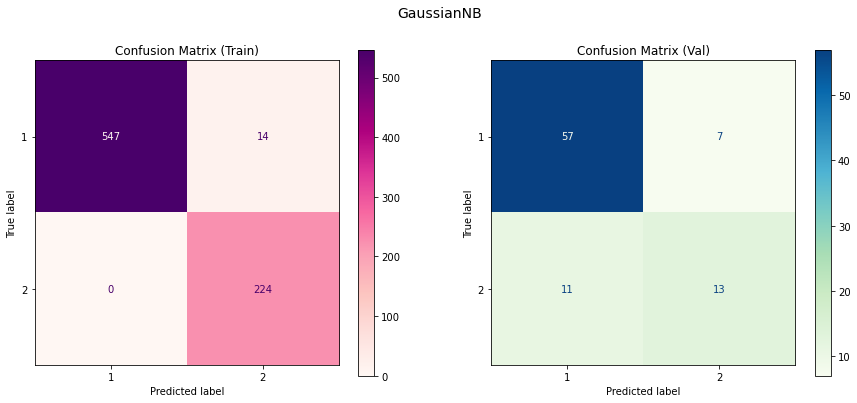

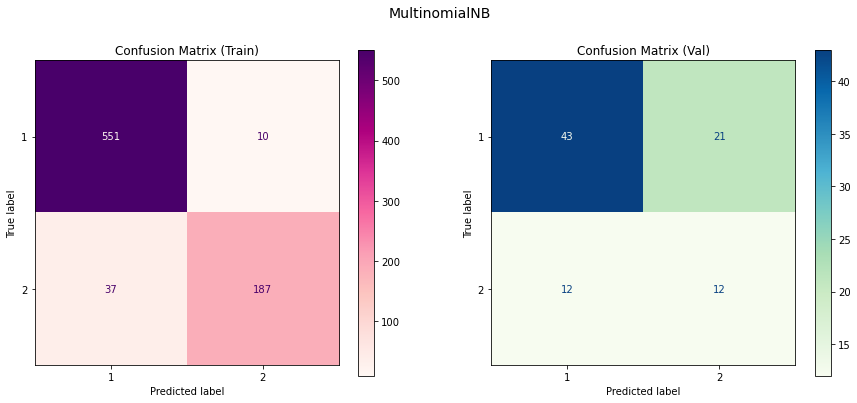

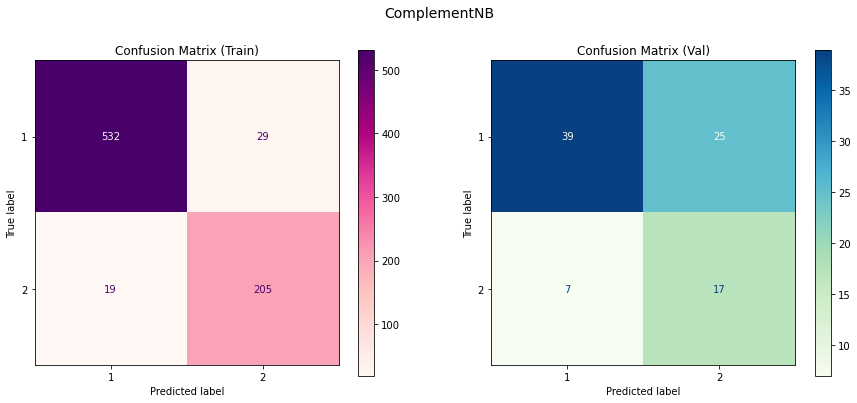

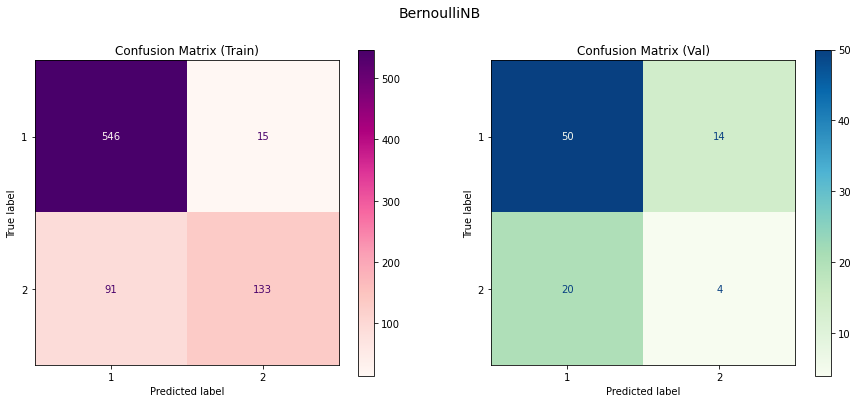

In [175]:
# start training process
for model in all_models:
    
    # model name
    model_name = model.__class__.__name__
    
    # train and test model
    model.fit(x_train, y_train)
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    recall_test = recall_score(y_test, model.predict(x_test))
    precision_test = precision_score(y_test, model.predict(x_test))
          
    # calculate confusion matrix for train and val subsets
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    # titles for plots (1 common and 2 for subplots)
    plt.suptitle(model_name, fontsize=14)
    axes[0].title.set_text('Confusion Matrix (Train)')
    axes[1].title.set_text('Confusion Matrix (Val)')
    plot_confusion_matrix(model, x_train, y_train, cmap=plt.cm.RdPu, ax=axes[0])
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.GnBu, ax=axes[1])    
        
    # write results to dataframe    
    model_result = {'Model':model_name, 
                    'Train_Accuracy':score_train, 
                    'Test_Accuracy':score_test, 
                    'Test_Recall':recall_test, 
                    'Test_Precision':precision_test}
    results = results.append(model_result, ignore_index = True)

In [176]:
# check the results of training
results

,Model,Train_Accuracy,Test_Accuracy,Test_Recall,Test_Precision
0,GaussianNB,0.982166,0.795455,0.890625,0.838235
1,MultinomialNB,0.940127,0.625000,0.671875,0.781818
2,ComplementNB,0.938854,0.636364,0.609375,0.847826
3,BernoulliNB,0.864968,0.613636,0.781250,0.714286


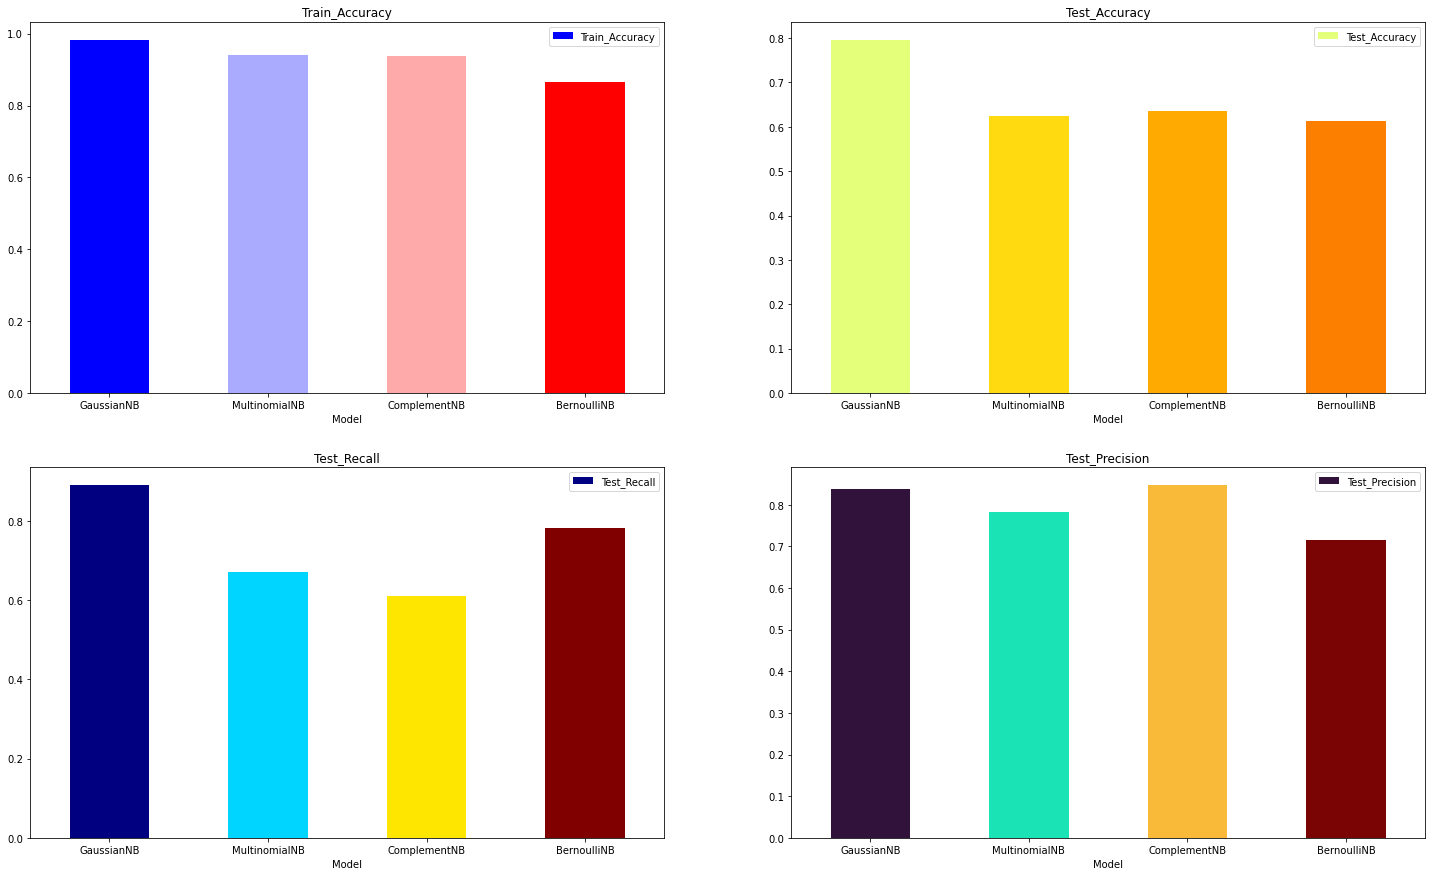

In [177]:
# for best understansding we can visualize the results
def plot_stats(df, ax, column, color_map):
    color_len = len(df[column])
    color = color_map(np.linspace(0, 1, color_len))
    df.plot.bar(x="Model", y=column, color=color, title = column, ax = ax, rot=0)

    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
plot_stats(results, axes[0][0], "Train_Accuracy", plt.cm.bwr)
plot_stats(results, axes[0][1], "Test_Accuracy", plt.cm.Wistia)
plot_stats(results, axes[1][0], "Test_Recall", plt.cm.jet)
plot_stats(results, axes[1][1], "Test_Precision", plt.cm.turbo)
plt.show()

In [ ]:
from hanspell import spell_checker
word = input()
result = spell_checker.check(f'{word}')
result.as_dict()  # dict로 출력
result
uese = []
for key, value in result.words.items():
    print(key)